In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("AIML Dataset.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0,1047433
1,1142


In [ ]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,1048575


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.shape

(1048575, 11)

In [ ]:
(df["isFraud"].value_counts()[1] / df.shape[0]) * 100

np.float64(0.10890971079798775)

In [ ]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) *100,2)

np.float64(0.11)

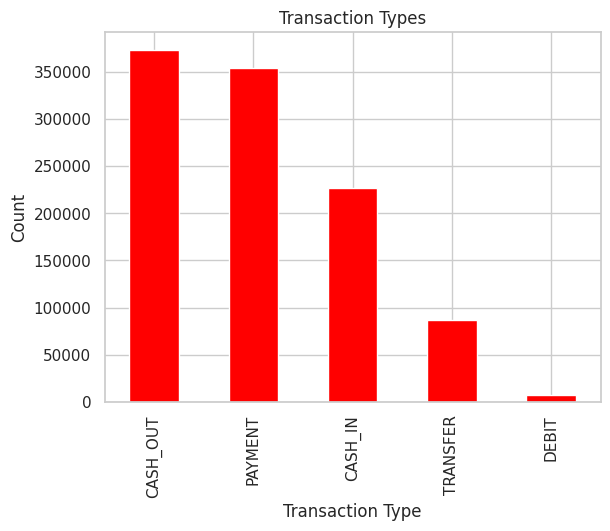

In [ ]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color= "red")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

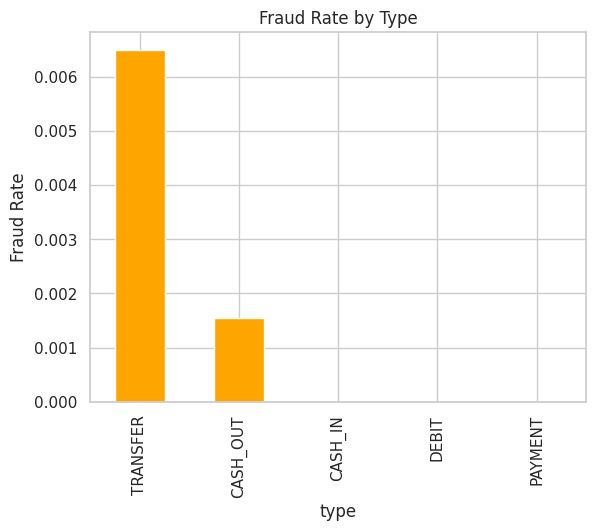

In [ ]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="orange")
plt.ylabel("Fraud Rate")
plt.show()

In [ ]:
df["amount"].describe().astype(int)

,amount
count,1048575
mean,158666
std,264940
min,0
25%,12149
50%,76343
75%,213761
max,10000000


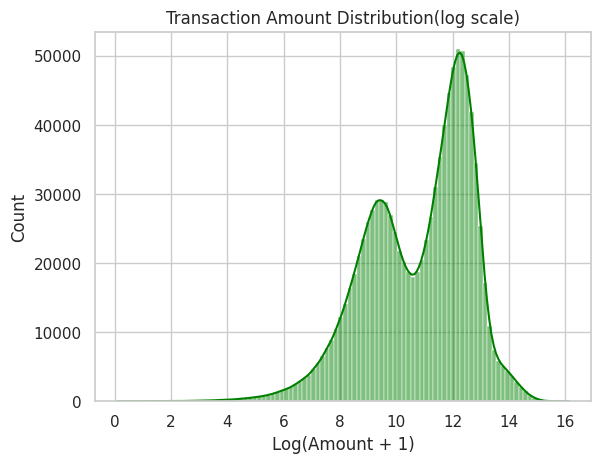

In [ ]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde = True, color = "green")
plt.title("Transaction Amount Distribution(log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

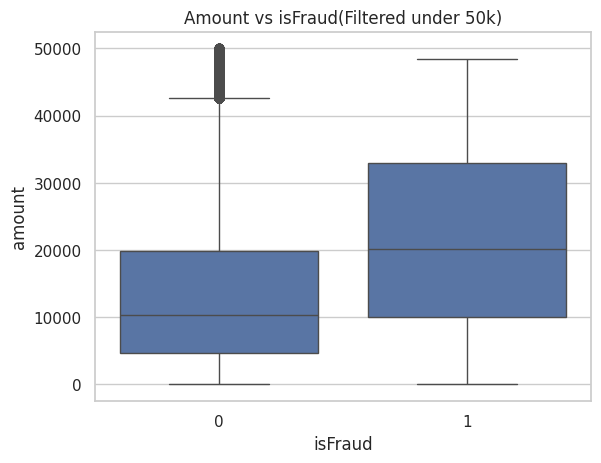

In [ ]:
sns.boxplot(data= df[df["amount"] < 50000], x = "isFraud", y ="amount")
plt.title("Amount vs isFraud(Filtered under 50k)")
plt.show()

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df["balancedDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balancedDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [ ]:
df["balancedDiffOrig"] < 0

,balancedDiffOrig
0,False
1,False
2,False
3,False
4,False
...,...
1048570,False
1048571,False
1048572,False
1048573,False


In [ ]:
(df["balancedDiffOrig"]<0).sum()

np.int64(227102)

In [ ]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


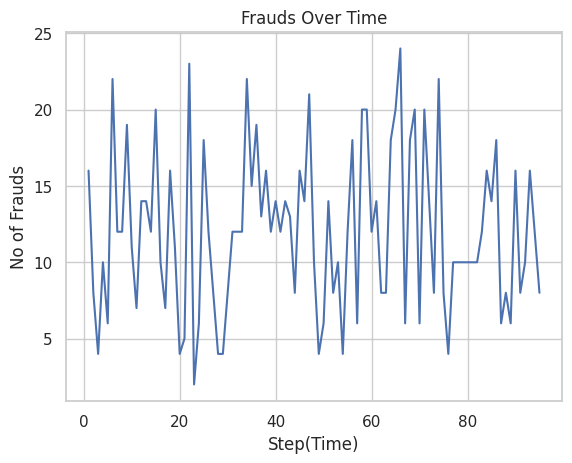

In [ ]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step(Time)")
plt.ylabel("No of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [ ]:
top_senders = df["nameOrig"].value_counts().head(10)
top_receivers = df["nameDest"].value_counts().head(10)

In [ ]:
top_senders

,count
nameOrig,
C443816828,2
C1598037681,2
C1959089715,2
C789225614,2
C1710302637,2
C1894222764,2
C1153681534,2
C2073023524,2
C90584452,2


In [ ]:
top_receivers

,count
nameDest,
C985934102,98
C1286084959,96
C1590550415,89
C248609774,88
C665576141,87
C2083562754,86
C977993101,82
C1360767589,81
C451111351,80


In [ ]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [ ]:
fraud_users

,count
nameOrig,
C409531429,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C824268591,1
C708686257,1
C395839623,1


In [ ]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [ ]:
fraud_types.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


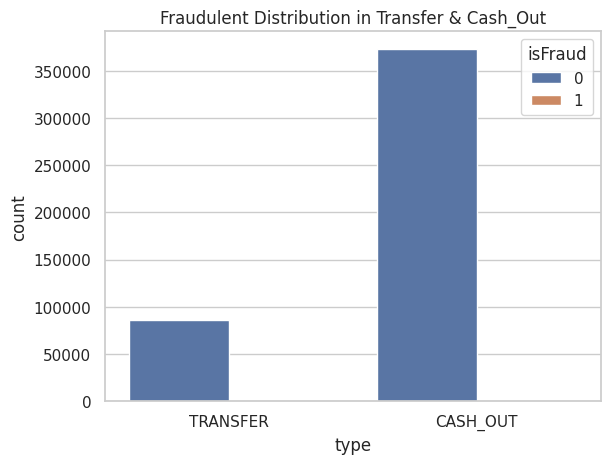

In [ ]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraudulent Distribution in Transfer & Cash_Out")
plt.show()

In [ ]:
corr = df[["amount","oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [ ]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.004864,-0.001132,0.215562,0.311942,0.128862
oldbalanceOrg,0.004864,1.000000,0.999050,0.093305,0.064050,0.003829
newbalanceOrig,-0.001132,0.999050,1.000000,0.095179,0.063722,-0.009438
oldbalanceDest,0.215562,0.093305,0.095179,1.000000,0.978401,-0.007553
newbalanceDest,0.311942,0.064050,0.063722,0.978401,1.000000,-0.000495
isFraud,0.128862,0.003829,-0.009438,-0.007553,-0.000495,1.000000


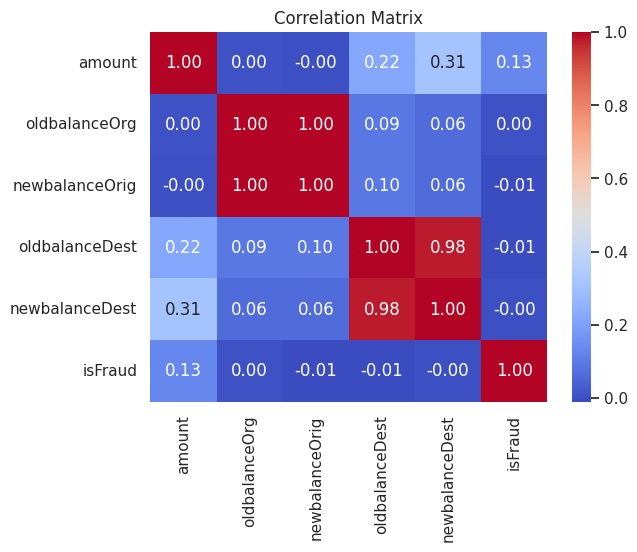

In [ ]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
zero_after_transfer = df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"])==0 &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [ ]:
len(zero_after_transfer)

583186

In [ ]:
zero_after_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.00,0,0,2671.0,0.00
10,1,DEBIT,9644.94,C1900366749,4465.0,0.0,C997608398,10845.0,157982.12,0,0,4465.0,147137.12
13,1,PAYMENT,11633.76,C1716932897,10127.0,0.0,M801569151,0.0,0.00,0,0,10127.0,0.00


In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0,1047433
1,1142


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)

In [ ]:
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedDiffOrig,balancedDiffDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [ ]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]


In [ ]:
y=df_model["isFraud"]
x=df_model.drop("isFraud", axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=y)

In [ ]:
preprocessor =ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder = "drop"
)

In [ ]:
pipeline = Pipeline(
    [
        ("prep", preprocessor),
        ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
    ]
)

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
y_pred = pipeline.predict(x_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97    314230
           1       0.02      0.97      0.03       343

    accuracy                           0.93    314573
   macro avg       0.51      0.95      0.50    314573
weighted avg       1.00      0.93      0.97    314573



In [ ]:
confusion_matrix(y_test, y_pred)

array([[293734,  20496],
       [    11,    332]])

In [ ]:
pipeline.score(x_test,y_test)

0.9348100440915146